In [ ]:
# this is the only line you need to change
# to build a custom image classification model for any dataset

num_classes = 9
class_labels = ['Bha', 'Cha', 'Chha', 'Ha', 'Ka', 'La', 'Ma', 'Pa', 'Ra']


In [ ]:
!unzip train.zip

In [ ]:
# load images from directory

from keras.utils import image_dataset_from_directory

train_data, valid_data = image_dataset_from_directory(
    directory='train', labels='inferred', class_names=class_labels,
    subset='both', validation_split=0.3,
    image_size=(224, 224), batch_size=64, seed=1555)

Found 2133 files belonging to 9 classes.
Using 1494 files for training.
Using 639 files for validation.


In [ ]:
# load pre-trained model

from keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freeze layers of base model

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# customize model by adding output layers

import keras
from keras import layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(['accuracy']))

In [ ]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 388s 16s/step - accuracy: 0.6094 - loss: 1.4446 - val_accuracy: 0.9859 - val_loss: 0.2277
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 381s 16s/step - accuracy: 0.9855 - loss: 0.1677 - val_accuracy: 0.9984 - val_loss: 0.0606
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 351s 15s/step - accuracy: 1.0000 - loss: 0.0522 - val_accuracy: 1.0000 - val_loss: 0.0322
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 372s 14s/step - accuracy: 0.9989 - loss: 0.0291 - val_accuracy: 0.9984 - val_loss: 0.0231
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 387s 15s/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0149


In [ ]:
# make sure to upload at least 20 test samples

!unzip test.zip

In [ ]:
# load sample images to test model output

import numpy as np
from keras.utils import load_img

test_sample = []
n = 25

for k in range(n):
    img_file = 'test/' + str(k+1) + ".jpg"
    test_img = load_img(img_file, target_size=(224, 224))
    test_sample.append(test_img)

np.array(test_sample).shape

(25, 224, 224, 3)

In [ ]:
# run predictions

y = model.predict(np.array(test_sample))

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


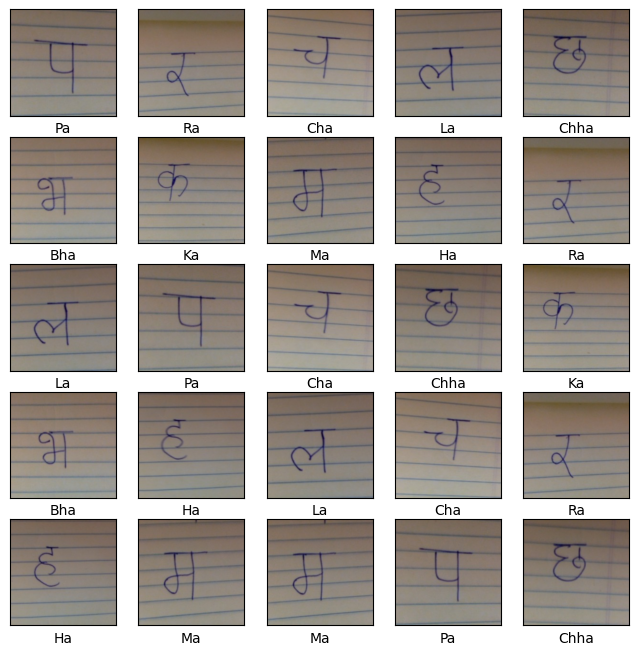

In [ ]:
# plot model output predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for k in range(n):
  plt.subplot(5, 5, k+1)
  plt.imshow(test_sample[k])

  plt.xlabel(class_labels[np.argmax(y[k])])
  plt.xticks([])
  plt.yticks([])